<a href="https://colab.research.google.com/github/Zahra-Alikhani2004/ML_Final-project-/blob/main/IranFutsal_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of dataset:


,نام,قد (متر),وزن (کیلوگرم),پست,سن شروع حرفه‌ای,سرعت,چابکی,استقامت,مهارت پاس,مهارت دریبل,مهارت شوت
0,وحید شمسایی,1.80,75,مهاجم,24,8,9,8,8,9,10
1,علی‌اصغر حسن‌زاده,1.70,70,Pivot,17,9,9,8,8,9,9
2,حسین طیبی,1.78,74,Pivot,18,9,9,9,8,9,9
3,محمد طاهری,1.78,74,مهاجم,18,8,8,8,8,8,9
4,مسلم اولادقباد,1.78,72,فلنک راست,20,9,9,8,8,8,8



Numeric summary of the dataset:


,قد (متر),وزن (کیلوگرم),سن شروع حرفه‌ای,سرعت,چابکی,استقامت,مهارت پاس,مهارت دریبل,مهارت شوت
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.790000,74.633333,19.433333,7.733333,8.600000,8.066667,7.600000,7.800000,8.166667
std,0.045863,2.965123,1.501340,0.827682,0.498273,0.365148,0.855006,1.374647,1.288767
min,1.700000,70.000000,17.000000,6.000000,8.000000,7.000000,6.000000,5.000000,6.000000
25%,1.765000,72.250000,18.000000,7.000000,8.000000,8.000000,7.000000,7.000000,7.250000
50%,1.780000,75.000000,20.000000,8.000000,9.000000,8.000000,8.000000,8.000000,8.000000
75%,1.807500,75.000000,20.000000,8.000000,9.000000,8.000000,8.000000,9.000000,9.000000
max,1.900000,82.000000,24.000000,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000


/tmp/ipython-input-3572980678.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='پست', palette="viridis")


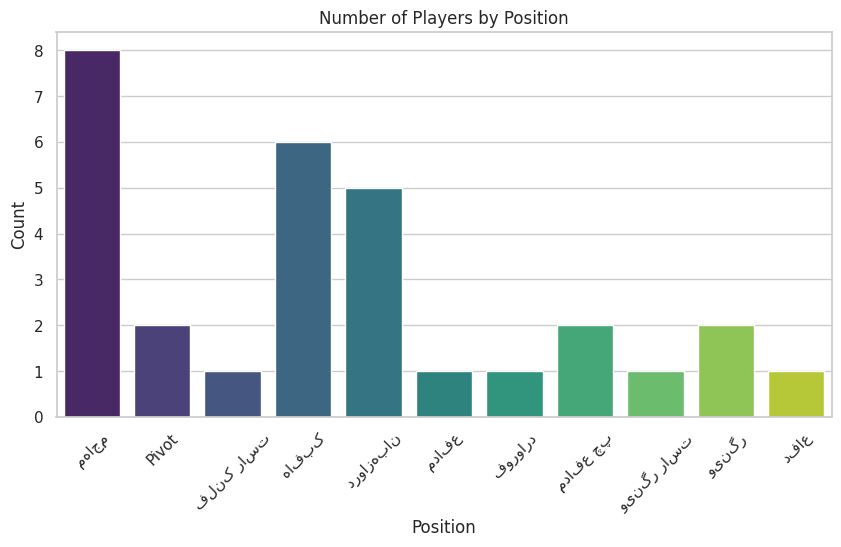

<Figure size 1200x600 with 0 Axes>

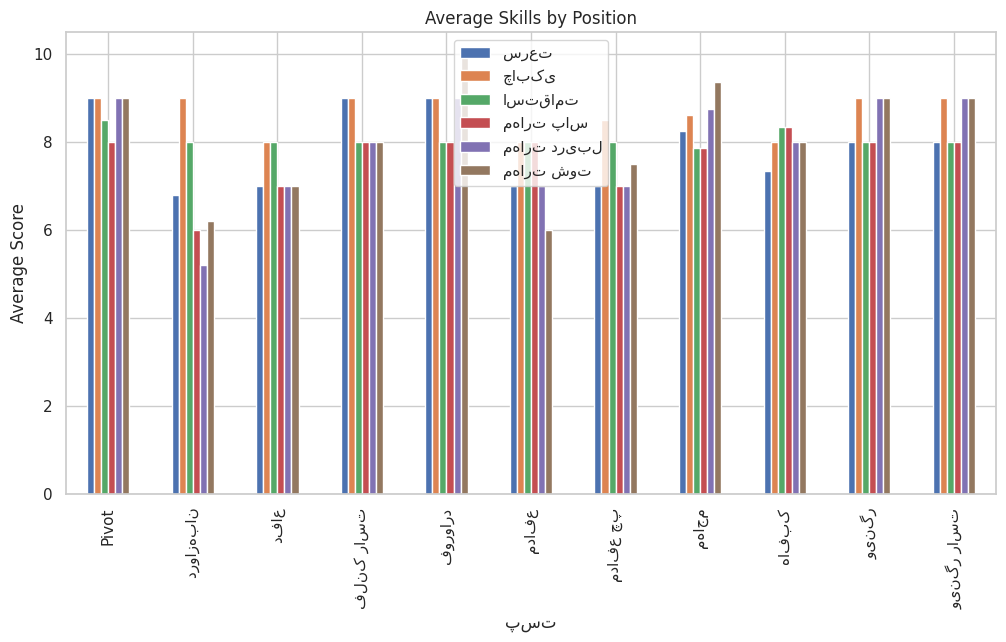


Top 10 Players by Skill Index:


,نام,پست,Skill_Index,سرعت,چابکی,استقامت,مهارت پاس,مهارت دریبل,مهارت شوت
2,حسین طیبی,Pivot,8.833333,9,9,9,8,9,9
13,سعید رجبی,مهاجم,8.833333,9,9,8,8,9,10
11,بابک معصومی,فوروارد,8.833333,9,9,8,8,9,10
0,وحید شمسایی,مهاجم,8.666667,8,9,8,8,9,10
1,علی‌اصغر حسن‌زاده,Pivot,8.666667,9,9,8,8,9,9
15,احمد اسماعیل‌پور,مهاجم,8.666667,8,9,8,8,9,10
29,بهروز عظیمی,مهاجم,8.666667,9,9,8,8,9,9
21,وحید شفیعی,وینگر,8.500000,8,9,8,8,9,9
16,علیرضا وفایی,مهاجم,8.500000,8,9,8,8,9,9
26,جواد اصغری مقدم,وینگر,8.500000,8,9,8,8,9,9


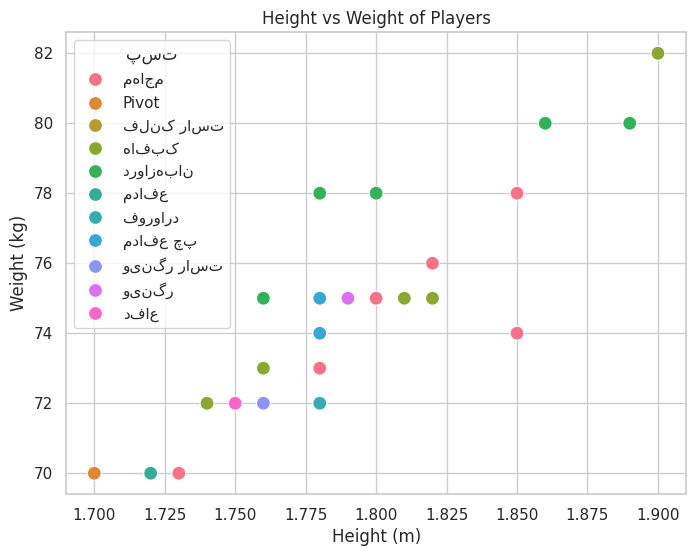

✅ Dataset with Skill Index saved: CSV + JSON in 'dataset/' folder


In [3]:
# ============================
# Notebook آماده: Iran Futsal Players Dataset Analysis
# ============================

# 1️⃣ Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

# 2️⃣ Load Dataset
# Replace with your GitHub raw CSV link or local path
url = "https://raw.githubusercontent.com/Zahra-Alikhani2004/ML_Final-project-/main/Futsal-IRAN-Dataset/futsal_iran_players.csv"
df = pd.read_csv(url)

# Display first 5 rows
print("First 5 rows of dataset:")
display(df.head())

# 3️⃣ Numeric Summary
print("\nNumeric summary of the dataset:")
display(df.describe())

# 4️⃣ Count of Players by Position
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='پست', palette="viridis")
plt.title("Number of Players by Position")
plt.xlabel("Position")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 5️⃣ Average Skills by Position
skill_columns = ['سرعت','چابکی','استقامت','مهارت پاس','مهارت دریبل','مهارت شوت']
avg_skills = df.groupby('پست')[skill_columns].mean()
plt.figure(figsize=(12,6))
avg_skills.plot(kind='bar', figsize=(12,6))
plt.title("Average Skills by Position")
plt.ylabel("Average Score")
plt.show()

# 6️⃣ Overall Skill Index
df['Skill_Index'] = df[skill_columns].mean(axis=1)

# Top 10 Players by Skill Index
top_players = df.sort_values('Skill_Index', ascending=False).head(10)
print("\nTop 10 Players by Skill Index:")
display(top_players[['نام','پست','Skill_Index'] + skill_columns])

# 7️⃣ Height vs Weight Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='قد (متر)', y='وزن (کیلوگرم)', hue='پست', s=100)
plt.title("Height vs Weight of Players")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.show()

# 8️⃣ Save Dataset with Skill Index
# Create folder if it doesn't exist
os.makedirs("dataset", exist_ok=True)

# Save CSV and JSON
df.to_csv("dataset/iran_futsal_players_with_skills.csv", index=False)
df.to_json("dataset/iran_futsal_players_with_skills.json", orient='records', force_ascii=False)

print("✅ Dataset with Skill Index saved: CSV + JSON in 'dataset/' folder")